# Importing Libararies

In [162]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

This cell is dedicated to importing all the necessary libraries. Any library that is used further in the project is imported in this cell.

# Mounting Files

In [163]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


First we mount the drive, in which the directory BreastData containing dataset resides. Note that he folder name is changed to avoid ambiguity with previous folder folder.

In [164]:
data = pd.read_csv('/content/drive/MyDrive/BreastData/breast cancer.csv')

The whole csv is read and stored.

In [165]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Here we get a general overview of the data.

In [166]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


The Unnamed column is removed.

# Data Preprocessing

In [167]:
train, test = train_test_split(data, test_size=0.2)

Data is splitted into train and test before any pre-processing to prevent data leakage.

In [168]:
train

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
543,922296,B,13.210,28.06,84.88,538.4,0.08671,0.06877,0.02987,0.03275,...,14.37,37.17,92.48,629.6,0.1072,0.13810,0.1062,0.07958,0.2473,0.06443
33,854002,M,19.270,26.47,127.90,1162.0,0.09401,0.17190,0.16570,0.07593,...,24.15,30.90,161.40,1813.0,0.1509,0.65900,0.6091,0.17850,0.3672,0.11230
457,9112367,B,13.210,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,...,14.35,34.23,91.29,632.9,0.1289,0.10630,0.1390,0.06005,0.2444,0.06788
370,9012315,M,16.350,23.29,109.00,840.4,0.09742,0.14970,0.18110,0.08773,...,19.38,31.03,129.30,1165.0,0.1415,0.46650,0.7087,0.22480,0.4824,0.09614
28,852973,M,15.300,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,...,20.27,36.71,149.30,1269.0,0.1641,0.61100,0.6335,0.20240,0.4027,0.09876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,925236,B,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.00000,...,10.49,34.24,66.50,330.6,0.1073,0.07158,0.0000,0.00000,0.2475,0.06969
194,87556202,M,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,...,16.08,27.78,118.60,784.7,0.1316,0.46480,0.4589,0.17270,0.3000,0.08701
318,894329,B,9.042,18.90,60.07,244.5,0.09968,0.19720,0.19750,0.04908,...,10.06,23.40,68.62,297.1,0.1221,0.37480,0.4609,0.11450,0.3135,0.10550
172,87164,M,15.460,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.10970,...,18.79,17.04,125.00,1102.0,0.1531,0.35830,0.5830,0.18270,0.3216,0.10100


Here we get an overview of train data.

In [169]:
train.shape

(455, 32)

Train data has 455 records.

In [170]:
test

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
486,913102,B,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.027910,...,16.46,25.44,106.00,831.0,0.11420,0.2070,0.24370,0.07828,0.2455,0.06596
156,8711202,M,17.68,20.74,117.40,963.7,0.11150,0.16650,0.18550,0.105400,...,20.47,25.11,132.90,1302.0,0.14180,0.3498,0.35830,0.15150,0.2463,0.07738
354,901011,B,11.14,14.07,71.24,384.6,0.07274,0.06064,0.04505,0.014710,...,12.12,15.82,79.62,453.5,0.08864,0.1256,0.12010,0.03922,0.2576,0.07018
317,894326,M,18.22,18.87,118.70,1027.0,0.09746,0.11170,0.11300,0.079500,...,21.84,25.00,140.90,1485.0,0.14340,0.2763,0.38530,0.17760,0.2812,0.08198
213,881094802,M,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.065970,...,18.07,28.07,120.40,1021.0,0.12430,0.1793,0.28030,0.10990,0.1603,0.06818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,898678,B,12.06,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,...,13.64,27.06,86.54,562.6,0.12890,0.1352,0.04506,0.05093,0.2880,0.08083
413,905557,B,14.99,22.11,97.53,693.7,0.08515,0.10250,0.06859,0.038760,...,16.76,31.55,110.20,867.1,0.10770,0.3345,0.31140,0.13080,0.3163,0.09251
481,91227,B,13.90,19.24,88.73,602.9,0.07991,0.05326,0.02995,0.020700,...,16.41,26.42,104.40,830.5,0.10640,0.1415,0.16730,0.08150,0.2356,0.07603
158,871122,B,12.06,12.74,76.84,448.6,0.09311,0.05241,0.01972,0.019630,...,13.14,18.41,84.08,532.8,0.12750,0.1232,0.08636,0.07025,0.2514,0.07898


Here we get an overview of test data.

In [171]:
train.head(100)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
543,922296,B,13.21,28.06,84.88,538.4,0.08671,0.06877,0.029870,0.032750,...,14.37,37.17,92.48,629.6,0.1072,0.1381,0.10620,0.07958,0.2473,0.06443
33,854002,M,19.27,26.47,127.90,1162.0,0.09401,0.17190,0.165700,0.075930,...,24.15,30.90,161.40,1813.0,0.1509,0.6590,0.60910,0.17850,0.3672,0.11230
457,9112367,B,13.21,25.25,84.10,537.9,0.08791,0.05205,0.027720,0.020680,...,14.35,34.23,91.29,632.9,0.1289,0.1063,0.13900,0.06005,0.2444,0.06788
370,9012315,M,16.35,23.29,109.00,840.4,0.09742,0.14970,0.181100,0.087730,...,19.38,31.03,129.30,1165.0,0.1415,0.4665,0.70870,0.22480,0.4824,0.09614
28,852973,M,15.30,25.27,102.40,732.4,0.10820,0.16970,0.168300,0.087510,...,20.27,36.71,149.30,1269.0,0.1641,0.6110,0.63350,0.20240,0.4027,0.09876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,909410,B,14.02,15.66,89.59,606.5,0.07966,0.05581,0.020870,0.026520,...,14.91,19.31,96.53,688.9,0.1034,0.1017,0.06260,0.08216,0.2136,0.06710
303,892657,B,10.49,18.61,66.86,334.3,0.10680,0.06678,0.022970,0.017800,...,11.06,24.54,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842
185,874158,B,10.08,15.11,63.76,317.5,0.09267,0.04695,0.001597,0.002404,...,11.87,21.18,75.39,437.0,0.1521,0.1019,0.00692,0.01042,0.2933,0.07697
366,9011494,M,20.20,26.83,133.70,1234.0,0.09905,0.16690,0.164100,0.126500,...,24.19,33.81,160.00,1671.0,0.1278,0.3416,0.37030,0.21520,0.3271,0.07632


In [172]:
train.replace('?', np.nan, inplace=True)
test.replace('?', np.nan, inplace=True)

We want to make sure there are no missing values depicted by ?.

<Axes: >

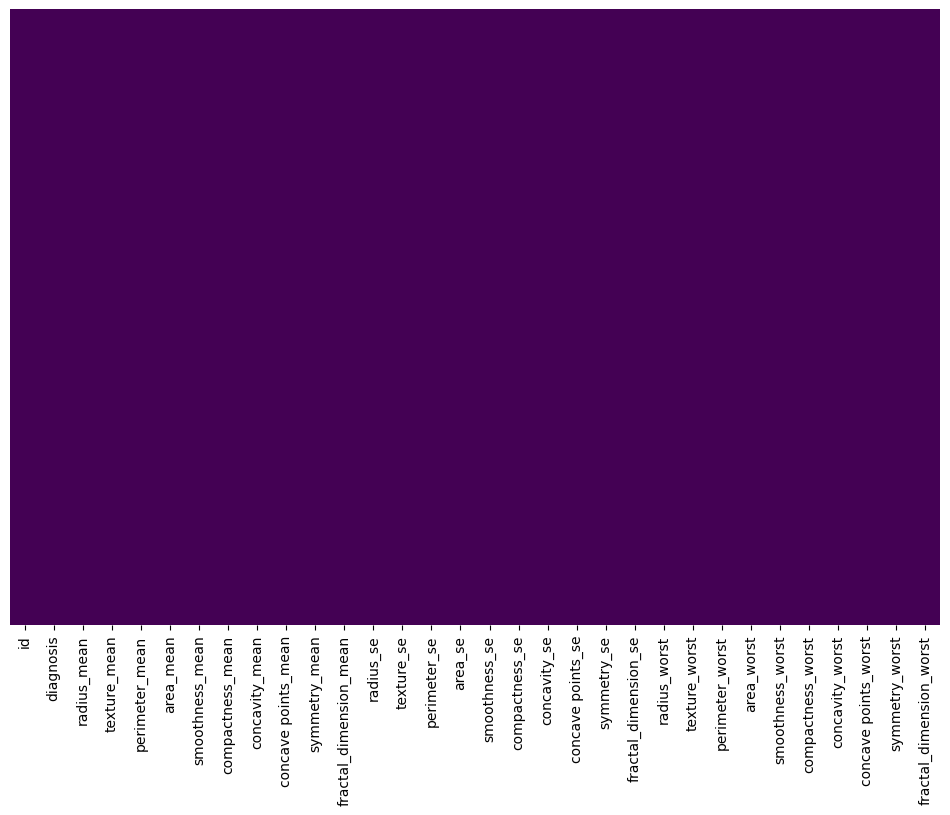

In [173]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

As is shown above, there are no missing values.

In [174]:
train.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Here we check the attribute types and see they are all correct.

In [175]:
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

We notice that `id` is redundant as it contributes no useful information for further use. Hence it is dropped.

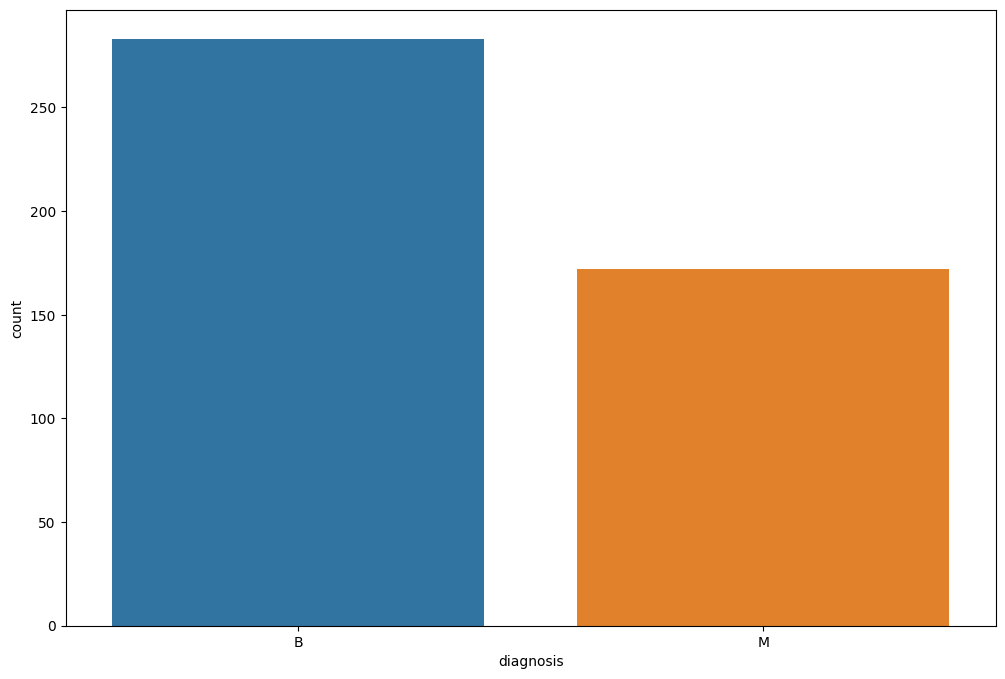

In [176]:
# drawing bar countplots for all categorical attributes
for column in train.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(12, 8))
    sns.countplot(x=f'{column}', data=train)
    plt.show()

The only categorical feature is `diagnosis` and is plotted. We can see a good balance here.

<ipython-input-177-1ffe726fbe40>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


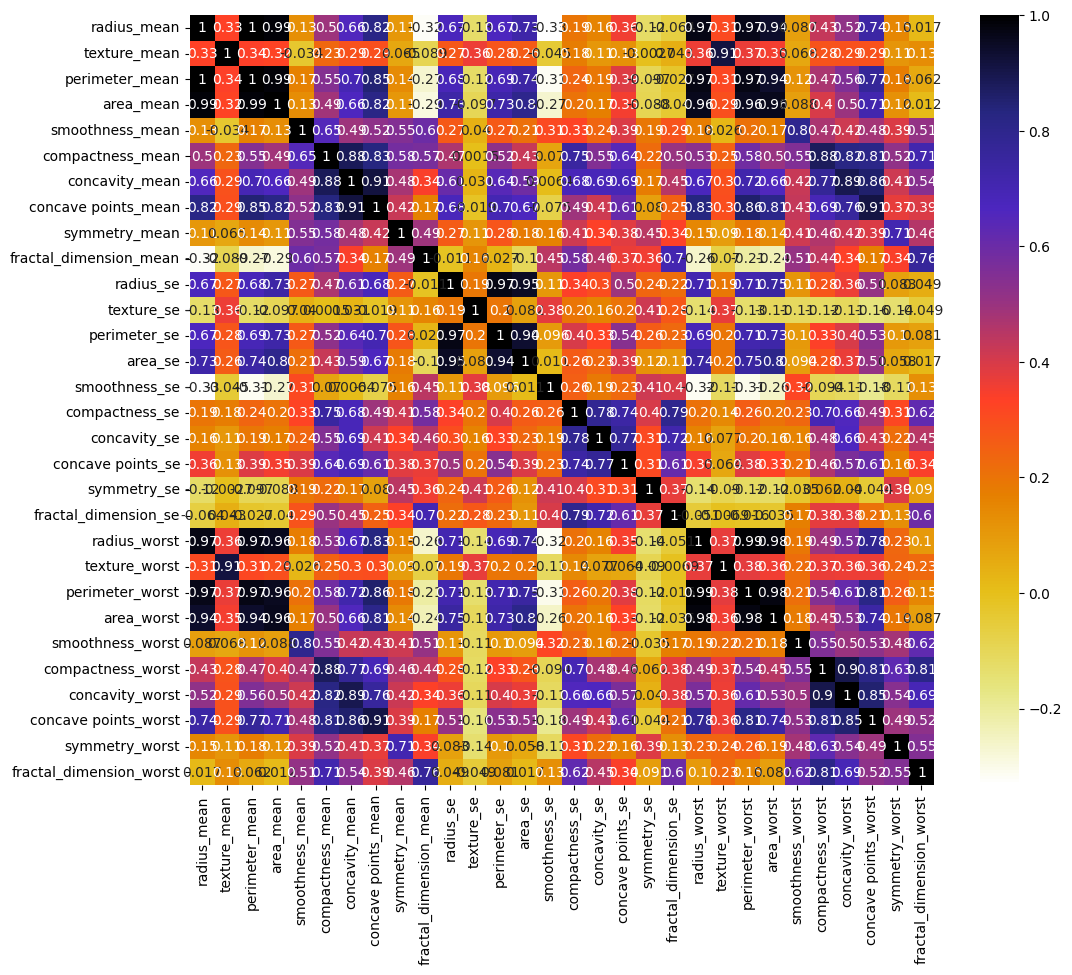

In [177]:
plt.figure(figsize=(12, 10))
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

The description text file points out some attributes to be dependent on each other and here also some high correlations can be seen as expceted.

In [178]:
correlated_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) >= 0.8:
            correlated_features.add(corr_matrix.columns[i])

# checking correlated features
correlated_features

{'area_mean',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_mean',
 'concavity_worst',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst'}

Here all the correlated features are listed, correlated pair being identified using a treshold of 80%.

In [179]:
train.drop(correlated_features, axis=1, inplace=True)
test.drop(correlated_features, axis=1, inplace=True)

After dropping the correlated features, we are left with 18 attributes.

In [180]:
X_train = train.drop('diagnosis', axis=1)
X_test = test.drop('diagnosis', axis=1)
y_train = train['diagnosis']
y_test = test['diagnosis']

Here the train and test sets are each splitted to X and y components.

In [181]:
y_train = y_train.apply(lambda x: 0 if x == 'B' else 1)
y_test = y_test.apply(lambda x: 0 if x == 'B' else 1)

In [182]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the Model

In [183]:
models = []

for i in range(4):
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(units=X_train_scaled.shape[1], input_shape=(X_train_scaled.shape[1],)))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    models.append(model)

We build the MLP which has the following characteristics:
* The input layer has 18 neurons and it has the same number of neurons as the input attributes.
* There are two hidden layers, the first one having 16 neurons and the second having 32, and the activation function for both is ReLU.
* The last layer is the output layer and has only one neuron (since the task is binary classification) and the activation is sigmoid.
There are 18 features in our modified dataset and so the input shape is (18,) and the output shape is (1,).

In [184]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 16)                272       
                                                                 
 dense_49 (Dense)            (None, 16)                272       
                                                                 
 dense_50 (Dense)            (None, 32)                544       
                                                                 
 dense_51 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


A brief summary of the model is also provided here.

To evaluate the model, four instances of the same model are created in an array, `models`. `models[i]` is the model compiled and fit in the (`i` + 1)th training below.

# Training the Model

## First Training (lower learning rate, lower epoch)

In [185]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
models[0].compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
models[0].fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)
models[0].evaluate(X_test_scaled, y_test)

Epoch 1/10
12/12 [==============================] - 2s 31ms/step - loss: 0.6821 - accuracy: 0.5934 - val_loss: 0.6175 - val_accuracy: 0.7582
Epoch 2/10
12/12 [==============================] - 0s 6ms/step - loss: 0.5745 - accuracy: 0.7995 - val_loss: 0.5457 - val_accuracy: 0.8242
Epoch 3/10
12/12 [==============================] - 0s 5ms/step - loss: 0.4893 - accuracy: 0.8764 - val_loss: 0.4720 - val_accuracy: 0.8571
Epoch 4/10
12/12 [==============================] - 0s 6ms/step - loss: 0.4149 - accuracy: 0.8956 - val_loss: 0.4009 - val_accuracy: 0.8791
Epoch 5/10
12/12 [==============================] - 0s 6ms/step - loss: 0.3477 - accuracy: 0.9148 - val_loss: 0.3403 - val_accuracy: 0.8791
Epoch 6/10
12/12 [==============================] - 0s 7ms/step - loss: 0.2903 - accuracy: 0.9313 - val_loss: 0.2882 - val_accuracy: 0.8901
Epoch 7/10
12/12 [==============================] - 0s 5ms/step - loss: 0.2431 - accuracy: 0.9451 - val_loss: 0.2419 - val_accuracy: 0.9121
Epoch 8/10
12/12 [=

[0.12611380219459534, 0.9824561476707458]

Here the learning rate is too low, and even after 10 epochs we are not sure if the optimal solution is found or a suboptimal solution. This is because it takes longer with a low learning rate to reach the oprimal solution. However a good accuracy is achieved.

## Second Training (higher learning rate, lower epoch)

In [186]:
opt = tf.keras.optimizers.Adam(learning_rate=1.2)
models[1].compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
models[1].fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)
models[1].evaluate(X_test_scaled, y_test)

Epoch 1/10
12/12 [==============================] - 1s 22ms/step - loss: 1736.1779 - accuracy: 0.6291 - val_loss: 96.0765 - val_accuracy: 0.8022
Epoch 2/10
12/12 [==============================] - 0s 7ms/step - loss: 269.3520 - accuracy: 0.7912 - val_loss: 102.9522 - val_accuracy: 0.8022
Epoch 3/10
12/12 [==============================] - 0s 7ms/step - loss: 80.4300 - accuracy: 0.7555 - val_loss: 409.3073 - val_accuracy: 0.6374
Epoch 4/10
12/12 [==============================] - 0s 7ms/step - loss: 126.5799 - accuracy: 0.6841 - val_loss: 1.6018 - val_accuracy: 0.6703
Epoch 5/10
12/12 [==============================] - 0s 7ms/step - loss: 0.5676 - accuracy: 0.6291 - val_loss: 0.5964 - val_accuracy: 0.5604
Epoch 6/10
12/12 [==============================] - 0s 7ms/step - loss: 0.7701 - accuracy: 0.6209 - val_loss: 1.1980 - val_accuracy: 0.5385
Epoch 7/10
12/12 [==============================] - 0s 8ms/step - loss: 0.6388 - accuracy: 0.6566 - val_loss: 0.5261 - val_accuracy: 0.6813
Epoch 

[0.49977684020996094, 0.7017543911933899]

Here the learning rate is too high, and so the algorithm diverges, and it gets further away from the optimal point. An alternating pattern can also be seen in the values of accuracy in each epoch and in the final epochs, just as it seems to have converged to 63.7% accuracy, it finally obtains an accuracy of around 62%.

## Third Training (lower learning rate, higher epoch)

In [187]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
models[2].compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
models[2].fit(X_train_scaled, y_train, epochs=60, validation_split=0.2)
models[2].evaluate(X_test_scaled, y_test)

Epoch 1/60
12/12 [==============================] - 1s 20ms/step - loss: 0.8361 - accuracy: 0.3297 - val_loss: 0.8145 - val_accuracy: 0.2857
Epoch 2/60
12/12 [==============================] - 0s 5ms/step - loss: 0.7399 - accuracy: 0.3846 - val_loss: 0.7294 - val_accuracy: 0.3626
Epoch 3/60
12/12 [==============================] - 0s 7ms/step - loss: 0.6756 - accuracy: 0.5604 - val_loss: 0.6651 - val_accuracy: 0.6703
Epoch 4/60
12/12 [==============================] - 0s 7ms/step - loss: 0.6188 - accuracy: 0.7857 - val_loss: 0.6088 - val_accuracy: 0.8022
Epoch 5/60
12/12 [==============================] - 0s 7ms/step - loss: 0.5641 - accuracy: 0.8874 - val_loss: 0.5500 - val_accuracy: 0.9011
Epoch 6/60
12/12 [==============================] - 0s 6ms/step - loss: 0.5023 - accuracy: 0.9203 - val_loss: 0.4861 - val_accuracy: 0.9231
Epoch 7/60
12/12 [==============================] - 0s 6ms/step - loss: 0.4348 - accuracy: 0.9341 - val_loss: 0.4189 - val_accuracy: 0.9341
Epoch 8/60
12/12 [=

[0.32339033484458923, 0.9561403393745422]

Using a higher number of epochs while keeping the learning rate low proves our hypothesis from first training; it takes a long time to converge to the optimal solution (about 47 epochs when we ran the code) and the obtained accuracy is so high.

## Fourth Training (higher learning rate, higher epoch)

In [188]:
opt = tf.keras.optimizers.Adam(learning_rate=1.2)
models[3].compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
models[3].fit(X_train_scaled, y_train, epochs=60, validation_split=0.2)
models[3].evaluate(X_test_scaled, y_test)

Epoch 1/60
12/12 [==============================] - 2s 31ms/step - loss: 714.0718 - accuracy: 0.6758 - val_loss: 38.5317 - val_accuracy: 0.6593
Epoch 2/60
12/12 [==============================] - 0s 9ms/step - loss: 10.8227 - accuracy: 0.5137 - val_loss: 0.6245 - val_accuracy: 0.6813
Epoch 3/60
12/12 [==============================] - 0s 8ms/step - loss: 1.1703 - accuracy: 0.6374 - val_loss: 0.6507 - val_accuracy: 0.6593
Epoch 4/60
12/12 [==============================] - 0s 11ms/step - loss: 0.6816 - accuracy: 0.6236 - val_loss: 0.6369 - val_accuracy: 0.6593
Epoch 5/60
12/12 [==============================] - 0s 8ms/step - loss: 0.6936 - accuracy: 0.6126 - val_loss: 0.6985 - val_accuracy: 0.3516
Epoch 6/60
12/12 [==============================] - 0s 8ms/step - loss: 0.6903 - accuracy: 0.6071 - val_loss: 0.6905 - val_accuracy: 0.3516
Epoch 7/60
12/12 [==============================] - 0s 11ms/step - loss: 0.6891 - accuracy: 0.5412 - val_loss: 0.6526 - val_accuracy: 0.6593
Epoch 8/60
12

[0.7417569160461426, 0.359649121761322]

Using higher epochs while keeping the learning rate high as well just shows the jumping of the algorithm much better. The alternating pattern can still be seen and the obtained accuracy is not optimal at all.

# Evaluating the Best Model

The best model is the third model, i.e. `models[2]`, which is obtained using a low learning rate and a higher epoch. Here we evaluate this model and analyze it further.

In [189]:
predictions = models[2].predict(X_test_scaled)
predictions

4/4 [==============================] - 0s 3ms/step


array([[1.84643287e-02],
       [9.99999821e-01],
       [7.08653897e-06],
       [9.99929309e-01],
       [6.74947043e-11],
       [9.99486864e-01],
       [2.06995232e-04],
       [9.99979556e-01],
       [2.74137571e-03],
       [5.08986195e-05],
       [9.99928713e-01],
       [3.15018952e-01],
       [9.99999881e-01],
       [1.51479691e-01],
       [9.31664944e-01],
       [2.91911158e-04],
       [1.00000000e+00],
       [9.98156548e-01],
       [1.79023875e-04],
       [4.63730174e-07],
       [1.16340925e-04],
       [3.73183750e-04],
       [2.09490699e-03],
       [9.99999404e-01],
       [7.47444437e-06],
       [1.00302892e-02],
       [9.99998450e-01],
       [1.01162903e-01],
       [8.70828778e-02],
       [3.25528235e-05],
       [1.77820402e-04],
       [1.91252857e-01],
       [8.93876374e-01],
       [2.12102965e-03],
       [2.72602832e-04],
       [9.73511051e-05],
       [1.68919750e-02],
       [1.64666888e-03],
       [3.09510302e-04],
       [5.28251840e-05],


In [190]:
y_pred = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
y_pred

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],

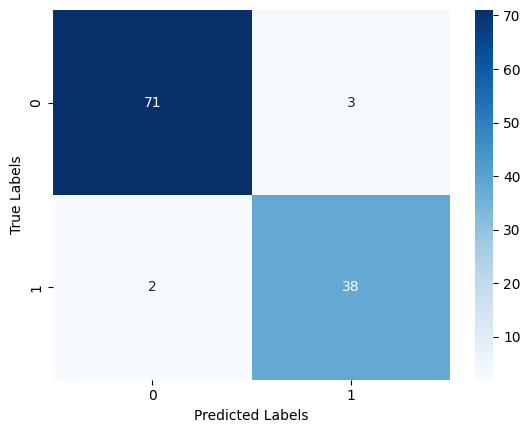

In [191]:
# Create the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [192]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        74
           1       0.93      0.95      0.94        40

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

